In [1]:
import pandas as pd
import numpy as np

In [2]:
prosttate_train=pd.read_csv("./prostate.training.txt",sep='\t')
X=prosttate_train[["lcavol","lweight","age","lbph","svi","lcp","gleason","pgg45"]].copy()

In [3]:
y= prosttate_train[["lpsa"]].copy()
b0=y.mean().to_numpy()


In [4]:
# get xbar of each predictor
x_bar=X.mean()


In [5]:
# centered X matrix
trainstandard_dev=X.std()
X=X-x_bar
trainstandard_dev

lcavol      1.110862
lweight     0.427979
age         7.279082
lbph        1.462783
svi         0.346827
lcp         1.308962
gleason     0.754209
pgg45      27.858077
dtype: float64

In [6]:
# scale by dividing by standard deviation since we do not have orthonormal input
X=X/trainstandard_dev


In [7]:
# initialize different lambdas
l=[0,10,20,30,40,50,60,70,80,90,100]
# calculate different set of beta matrices based off the different lambda values
I=np.identity(X.shape[1])
B_ridge0=(np.linalg.inv((X.T @ X) + l[0]*I)) @ X.T @ y
B_ridge10=(np.linalg.inv((X.T @ X) + l[1]*I)) @ X.T @ y
B_ridge20=(np.linalg.inv((X.T @ X) + l[2]*I)) @ X.T @ y
B_ridge30=(np.linalg.inv((X.T @ X) + l[3]*I)) @ X.T @ y
B_ridge40=(np.linalg.inv((X.T @ X) + l[4]*I)) @ X.T @ y
B_ridge50=(np.linalg.inv((X.T @ X) + l[5]*I)) @ X.T @ y
B_ridge60=(np.linalg.inv((X.T @ X) + l[6]*I)) @ X.T @ y
B_ridge70=(np.linalg.inv((X.T @ X) + l[7]*I)) @ X.T @ y
B_ridge80=(np.linalg.inv((X.T @ X) + l[8]*I)) @ X.T @ y
B_ridge90=(np.linalg.inv((X.T @ X) + l[9]*I)) @ X.T @ y
B_ridge100=(np.linalg.inv((X.T @ X) + l[10]*I)) @ X.T @ y

In [8]:
# load in test set for testing
prosttate_test= pd.read_csv("./prostate.testing.txt",sep='\t')
Xtest=prosttate_test[["lcavol","lweight","age","lbph","svi","lcp","gleason","pgg45"]].copy()
Xtest

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,1.731656,3.369018,62,-1.386294,1,0.300105,7,30
1,2.807594,4.718052,65,-1.386294,1,2.463853,7,60
2,1.562346,3.695110,76,0.936093,1,0.810930,7,75
3,3.246491,4.101817,68,-1.386294,0,-1.386294,6,0
4,2.532903,3.677566,61,1.348073,1,-1.386294,7,15
5,2.830268,3.876396,68,-1.386294,1,1.321756,7,60
6,3.821004,3.896909,44,-1.386294,1,2.169054,7,40
7,2.907447,3.396185,52,-1.386294,1,2.463853,7,10
8,2.882564,3.773910,68,1.558145,1,1.558145,7,80
9,3.471966,3.974998,68,0.438255,1,2.904165,7,20


In [9]:
# we should scale the test set as well to keep consistency. 
Xtest=(Xtest-x_bar)/trainstandard_dev


In [10]:
Xtest

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,0.491462,-0.548499,-0.266865,-1.055925,2.485591,0.480567,0.350523,0.262001
1,1.460023,2.603606,0.145275,-1.055925,2.485591,2.133594,0.350523,1.338888
2,0.339049,0.213436,1.656455,0.531725,2.485591,0.870820,0.350523,1.877332
3,1.855119,1.163733,0.557415,-1.055925,-0.397695,-0.807781,-0.975369,-0.814886
4,1.212746,0.172443,-0.404244,0.813366,2.485591,-0.807781,0.350523,-0.276442
5,1.480434,0.637022,0.557415,-1.055925,2.485591,1.261072,0.350523,1.338888
6,2.372296,0.684952,-2.739704,-1.055925,2.485591,1.908378,0.350523,0.620964
7,1.549911,-0.485022,-1.640664,-1.055925,2.485591,2.133594,0.350523,-0.455923
8,1.527511,0.397557,0.557415,0.956977,2.485591,1.441665,0.350523,2.056813
9,2.058092,0.867412,0.557415,0.191388,2.485591,2.469977,0.350523,-0.096961


In [11]:
ytest=prosttate_test[["lpsa"]].copy()
ytest=ytest.to_numpy()

In [12]:
# now we predict using test set, we have 11 different lambdas so 11 different predict sets
pred0= (Xtest @ B_ridge0.to_numpy()+b0).to_numpy()
pred10=(Xtest @  B_ridge10.to_numpy()+b0).to_numpy()
pred20=(Xtest @  B_ridge20.to_numpy()+b0).to_numpy()
pred30=(Xtest @  B_ridge30.to_numpy()+b0).to_numpy()
pred40=(Xtest @  B_ridge40.to_numpy()+b0).to_numpy()
pred50=(Xtest @  B_ridge50.to_numpy()+b0).to_numpy()
pred60=(Xtest @  B_ridge60.to_numpy()+b0).to_numpy()
pred70=(Xtest @  B_ridge70.to_numpy()+b0).to_numpy()
pred80=(Xtest @  B_ridge80.to_numpy()+b0).to_numpy()
pred90=(Xtest @  B_ridge90.to_numpy()+b0).to_numpy()
pred100=(Xtest @  B_ridge100.to_numpy()+b0).to_numpy()


Method I Problem 1

In [13]:
# calculate MSE by 1/n * sum(actual-pred) ; 1/n * sum(pred-y)
MSE0= (1/ytest.shape[0])* sum((ytest-pred0)**2)
MSE10= (1/ytest.shape[0])* sum((ytest-pred10)**2)
MSE20= (1/ytest.shape[0])* sum((ytest-pred20)**2)
MSE30= (1/ytest.shape[0])* sum((ytest-pred30)**2)
MSE40= (1/ytest.shape[0])* sum((ytest-pred40)**2)
MSE50= (1/ytest.shape[0])* sum((ytest-pred50)**2)
MSE60= (1/ytest.shape[0])* sum((ytest-pred60)**2)
MSE70= (1/ytest.shape[0])* sum((ytest-pred70)**2)
MSE80= (1/ytest.shape[0])* sum((ytest-pred80)**2)
MSE90= (1/ytest.shape[0])* sum((ytest-pred90)**2)
MSE100= (1/ytest.shape[0])* sum((ytest-pred100)**2)

In [14]:
MSEs=[]
MSEs.append([MSE0,MSE10,MSE20,MSE30,MSE40,MSE50,MSE60,MSE70,MSE80,MSE90,MSE100])
MSEs[0]

[array([1.86403212]),
 array([2.09782514]),
 array([2.27128135]),
 array([2.41212767]),
 array([2.53226282]),
 array([2.6378046]),
 array([2.73235332]),
 array([2.81823346]),
 array([2.89704737]),
 array([2.96995444]),
 array([3.03782551])]

| lambda | 0 | 10 | 20| 30|40|50|60|70|80|90|100|
| --- | --- | --- |--- | --- | --- |--- | --- | --- | --- | --- | --- |
| Method 1 | 1.86403212 | 2.09782514 |2.27128135 |2.41212767 |2.53226282 |2.6378046 |2.73235332 |2.81823346 |2.89704737 |2.96995444 |3.03782551 |

Method 1 Problem 2

since for method 1 we need to plot lambda= {0...10,000}, then I will recalculate every lambda and every degree of freedom

In [15]:
prostatetrainplot = pd.read_csv('./prostate.training.txt', sep='\t')
Xplot = prostatetrainplot.to_numpy()
Xplot = np.delete(Xplot, -1, axis=1)
Xplot = np.delete(Xplot, 0, axis=1)

yplot = prostatetrainplot['lpsa'].to_numpy()

In [16]:
xbarplot=Xplot.mean(axis=0)

xbarplot

array([ 1.18570909,  3.6037641 , 63.94252874,  0.15829533,  0.13793103,
       -0.32893946,  6.73563218, 22.70114943])

In [17]:
xplotstd=Xplot.std(axis=0)
xplotstd

array([ 1.1044597 ,  0.42551202,  7.23712701,  1.45435223,  0.34482759,
        1.30141706,  0.74986236, 27.69751013])

In [18]:
Xplot=(Xplot-xbarplot)/xplotstd

In [19]:
lambdas_for_M1 = np.arange(0,10001,1)
beta_all = []
for i in lambdas_for_M1:
  beta_all.append(np.linalg.inv(Xplot.T@Xplot + i*np.identity(Xplot.shape[1]))@Xplot.T@yplot)


In [20]:
df = np.zeros(len(lambdas_for_M1))
for i, num in enumerate(lambdas_for_M1):
    df[i] = np.trace(Xplot @ np.linalg.inv((Xplot.T @ Xplot) + num*np.identity(Xplot.shape[1])) @ Xplot.T)

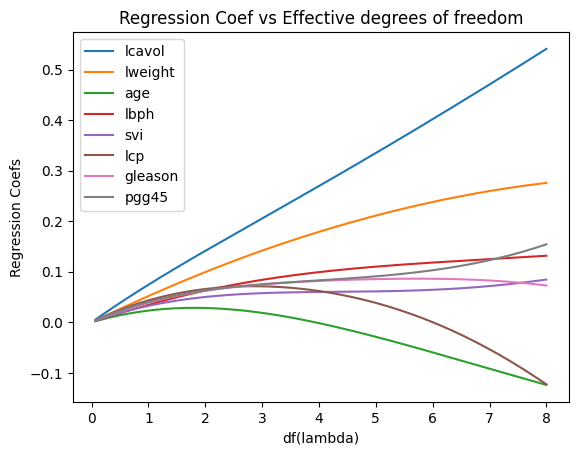

In [21]:
import matplotlib.pyplot as plt
plt.title("Regression Coef vs Effective degrees of freedom")
plt.xlabel("df(lambda)")
plt.ylabel("Regression Coefs")
plt.plot(df,beta_all)
plt.legend(["lcavol","lweight","age","lbph","svi","lcp","gleason","pgg45"])
plt.show()
